In [2]:
from skimage import data, io, filters, data_dir
import cv2
import os

In [ ]:
# Solução com SCIKIT-IMAGE

#image = data.coins()

filename = os.path.join(data_dir, 'brain.jpg')
image = io.imread(filename)

# ... or any other NumPy array!
edges = filters.sobel(image)
io.imshow(edges)
io.show()

In [11]:
# Solução com OpenCV
original_image = cv2.imread("images/brain.jpg")
#original_image = cv2.resize(original_image, (400, 400))

# Convertendo imagem em escala de cinza
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
# Aplicando o 


#cv2.imshow("Grayscale image", grayscale_image)

cv2.imshow("Original Image", original_image)
cv2.waitKey(0)

-1

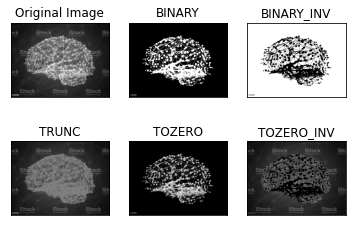

In [10]:
# Teste
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/brain.jpg', 0)

#img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret, thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV) 

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']

images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot( 2, 3, i + 1), plt.imshow(images[i], 'gray',vmin = 0, vmax = 255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()